In [106]:
!pip install matplotlib;
!pip install pandas;
!pip install seaborn;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;


## Red Wine Quality Dataset

The Kaggle Red Wine Quality dataset includes 11 physiochemical variables (inputs) as predictors for a sensory quality rating (output) for 1599 samples of Portuguese Vinho Verde red wine. From https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine, the variables are as follows:

Inputs:

1. fixed acidity: The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine. They mostly consist of tartaric, malic, citric or succinic acid that mostly originate from the grapes used to ferment the wine. They also do not evaporate easily. (g / dm^3)

2. volatile acidity: Acids that evaporate at low temperatures—mainly acetic acid which can lead to an unpleasant, vinegar-like taste at very high levels. (g / dm^3)

3. citric acid: Citric acid is used as an acid supplement which boosts the acidity of the wine. It's typically found in small quantities and can add 'freshness' and flavor to wines. (g / dm^3)

4. residual sugar: The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines residual sugar level greater than 45 grams/liter are considered sweet. On the other end of the spectrum, a wine that does not taste sweet is considered as dry. (g / dm^3)

5. chlorides: The amount of chloride salts (sodium chloride) present in the wine. (g / dm^3)

6. free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. All else constant, the higher the free sulfur dioxide content, the stronger the preservative effect. (mg / dm^3)

7. total sulfur dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (mg / dm^3)

8. density: The density of wine juice depending on the percent alcohol and sugar content; it's typically similar but higher than that of water (wine is 'thicker'). (g / cm^3)

9. pH: A measure of the acidity of wine; most wines are between 3-4 on the pH scale. The lower the pH, the more acidic the wine is; the higher the pH, the less acidic the wine. (The pH scale technically is a logarithmic scale that measures the concentration of free hydrogen ions floating around in your wine. Each point of the pH scale is a factor of 10. This means a wine with a pH of 3 is 10 times more acidic than a wine with a pH of 4)

10. sulphates: Amount of potassium sulphate as a wine additive which can contribute to sulfur dioxide gas (S02) levels; it acts as an antimicrobial and antioxidant agent.(g / dm3)

11. alcohol: How much alcohol is contained in a given volume of wine (ABV). Wine generally contains between 5–15% of alcohols. (% by volume)

Output:

12. quality: score between 0 (very bad) and 10 (very excellent) by wine experts

In [107]:
# Loading the data

github_url = 'https://raw.githubusercontent.com/nicholasaxl/datathon-jan-2024/main/winequality-red.csv'
pd.read_csv(github_url)
wine_data = pd.read_csv(github_url)
print('Wine Quality Dataset:')
print(wine_data.head())

Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

## Exploratory Data Analysis

To begin with, we can assess the cleanliness of the data and visualize the trends in the variables.

In [108]:
# Checking for missing values

null_values = wine_data.isnull().sum()
print(null_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [109]:
# Get data types of variables

data_types = wine_data.dtypes
print(data_types)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [110]:
# Get summary statistics

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [111]:
unique_quality_values = wine_data['quality'].unique()

print("Unique values in the 'quality' column:")
print(unique_quality_values)

Unique values in the 'quality' column:
[5 6 7 4 8 3]


The quality ratings in this dataset only range from 3 to 8.

<Figure size 2000x1500 with 0 Axes>

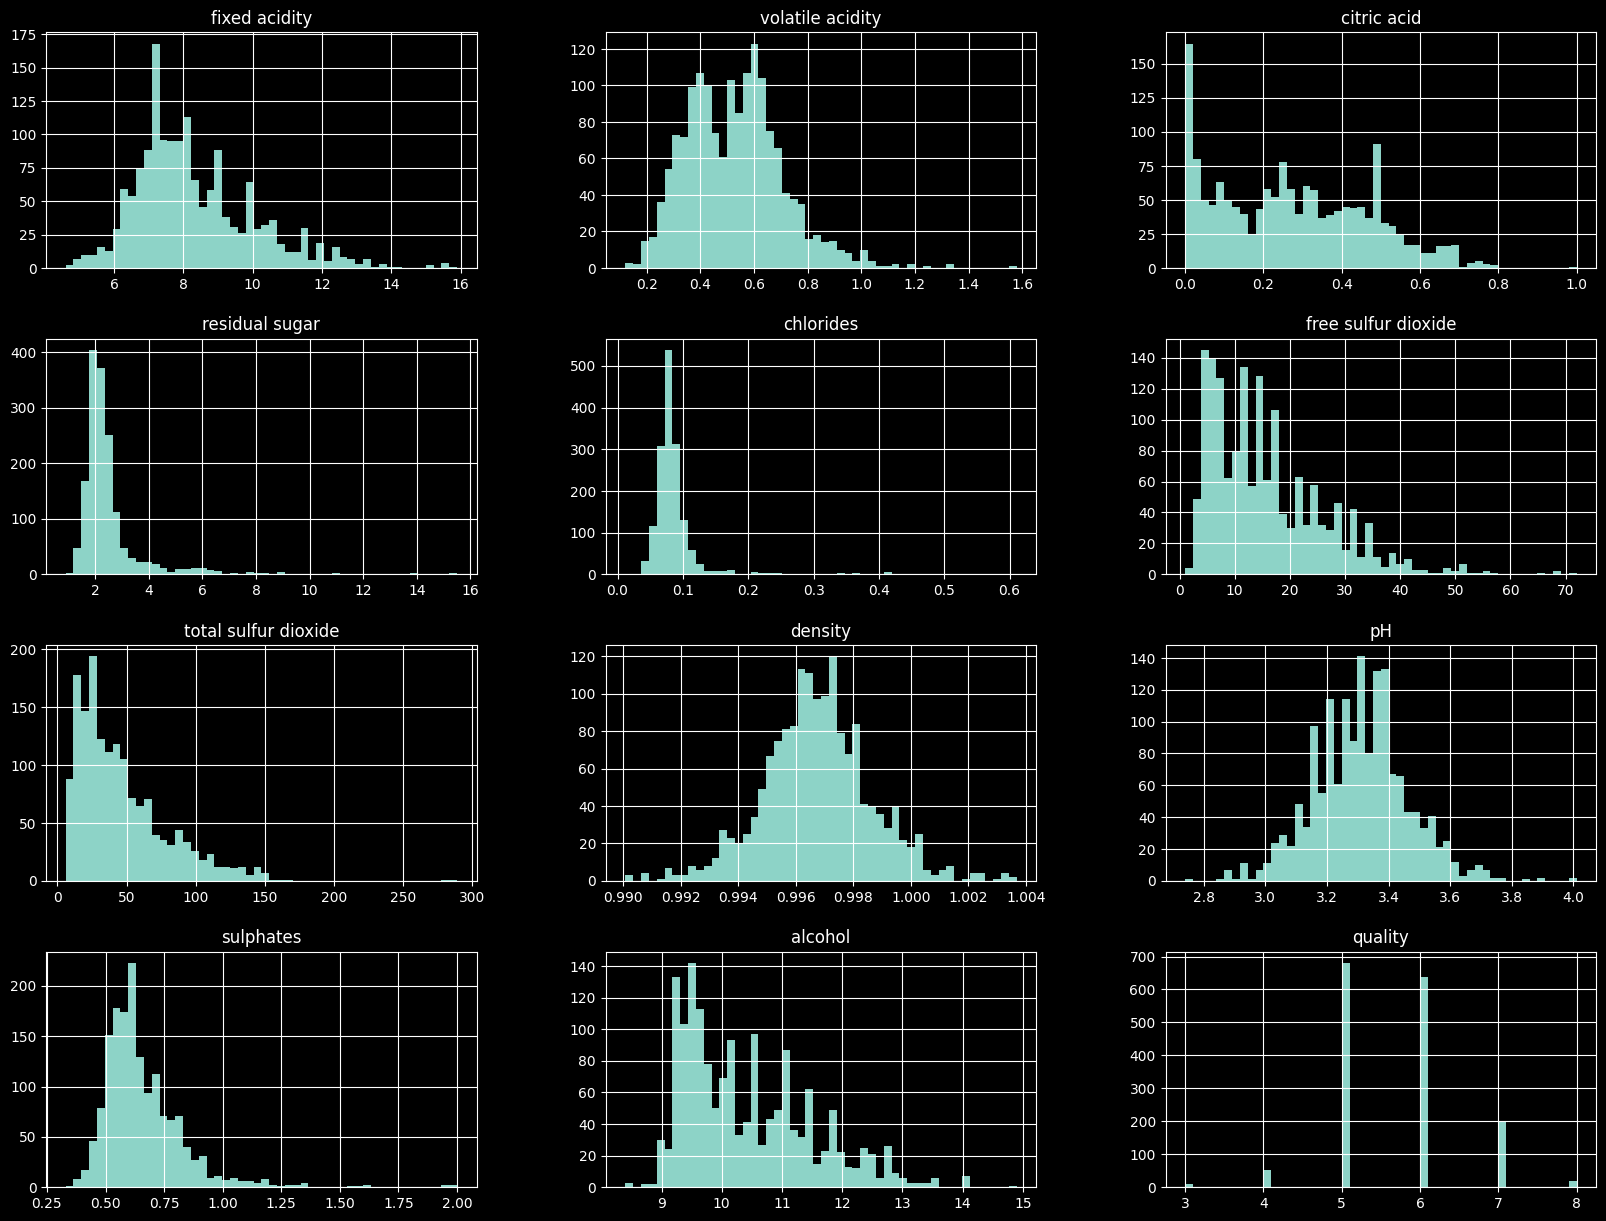

In [112]:
# Histograms

plt.figure(figsize=(20, 15))
wine_data.hist(bins=50, figsize=(20,15))
plt.show()

Density, pH, and quality seem to have symmetric distributions, while all the other variables exhibit right-skewed distributions. Notably, the majority of the wine samples are rated 5 or 6.

<Figure size 2000x1500 with 0 Axes>

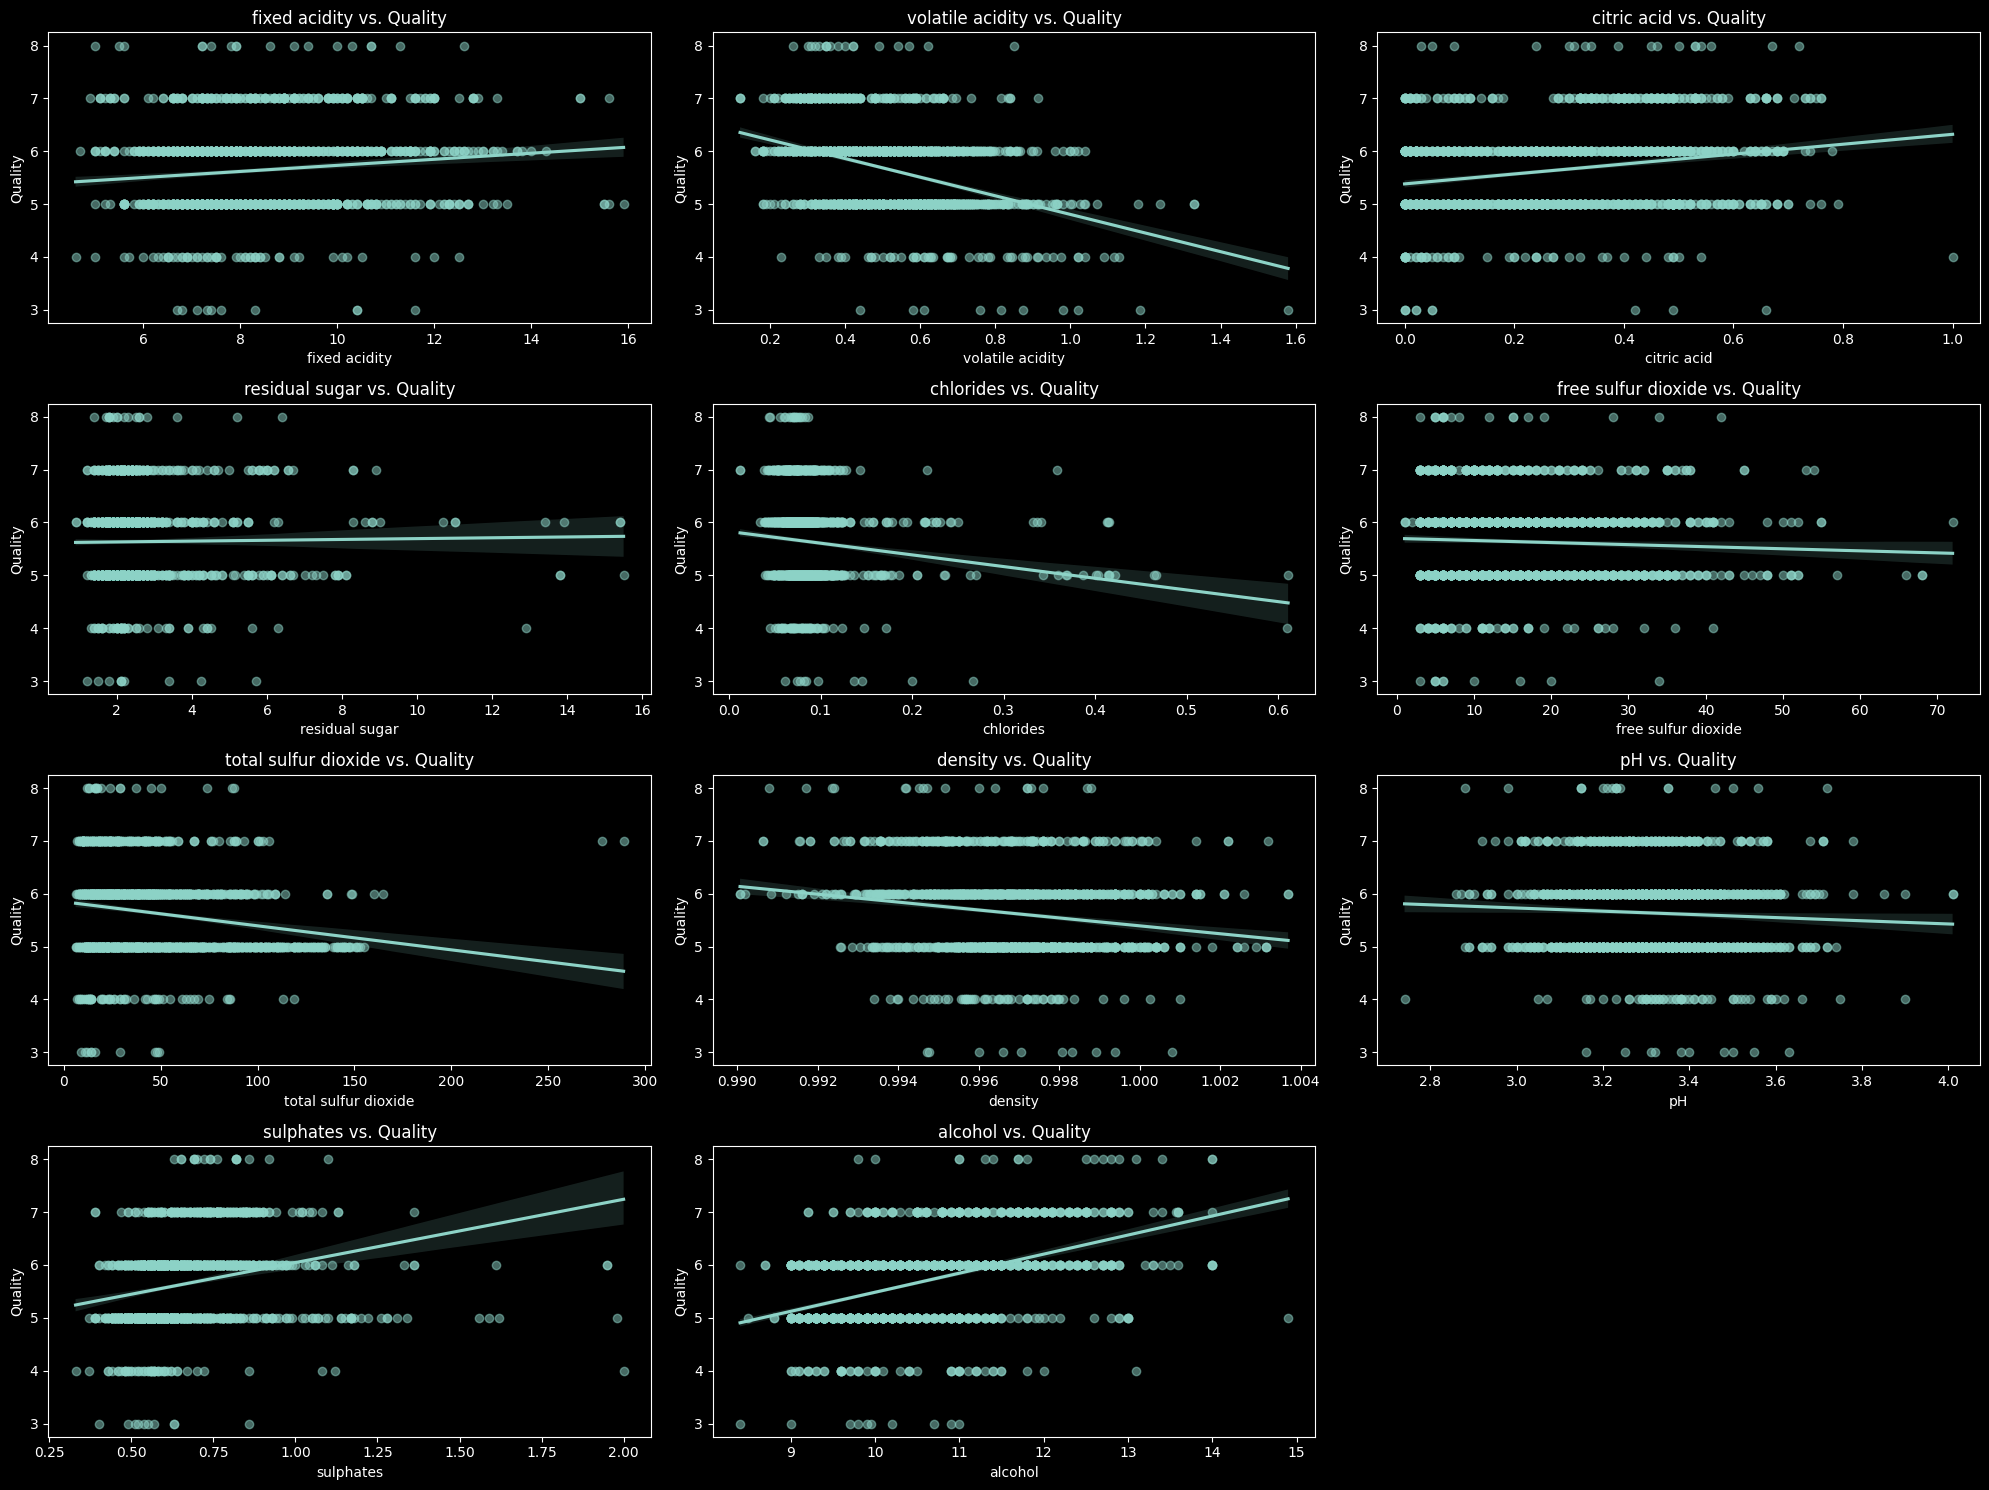

In [113]:
# Plotting input variables against quality

plt.figure(figsize=(20, 15))
columns_to_plot = wine_data.columns[:-1]

plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(4, 3, i)
    sns.regplot(x=column, y='quality', data=wine_data, scatter_kws={'alpha':0.5})
    plt.title(f'{column} vs. Quality')
    plt.xlabel(column)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()

Since quality only takes on integer values, the plots are a bit difficult to interpret. However, the trendlines show the overall correlation between the variables.

We can also use a correlation heatmap to visualize the trends in the data. 

<Axes: >

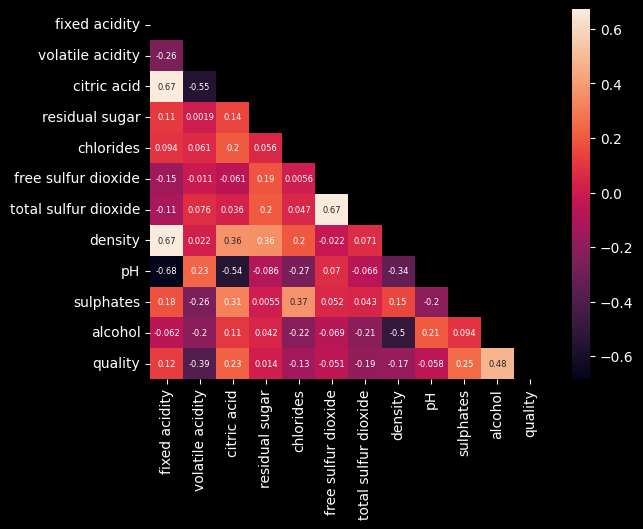

In [114]:
# Generate lower triangle correlation heatmap

orr = wine_data.corr()
tri = np.triu(corr)
sns.heatmap(wine_data.corr(), annot=True, mask=tri, annot_kws={"size": 6})

With respect to quality, we can see that alcohol has the strongest positive correlation with quality, followed by sulphates and citric acid, while volatile acidity has the strongest negative correlation. All the other variables have fairly weak correlations with quality.